# Neural Network Classification Examples

이번 실습에서는 TensorFlow를 활용하여 **Binary Classification, Multi-class Classification, Multi-label Classification** 
문제를 각각 해결하는 신경망 모델을 만들어봅니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, load_iris, make_multilabel_classification

## 1. Binary Classification
- 데이터: sklearn `make_classification`
- 출력: sigmoid activation

[1 0 1 1 0]


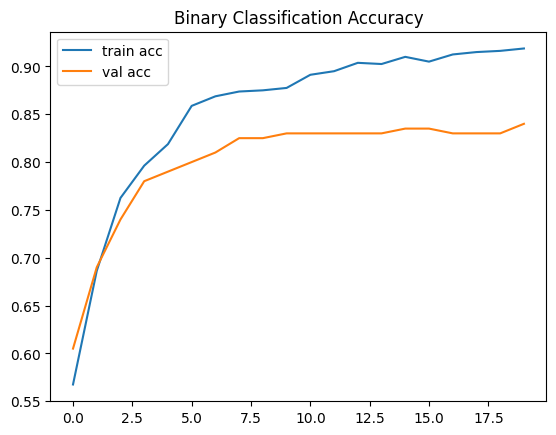

In [2]:
X_bin, y_bin = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

print(y_bin[0:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_bin = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bin = model_bin.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

plt.plot(history_bin.history['accuracy'], label='train acc')
plt.plot(history_bin.history['val_accuracy'], label='val acc')
plt.title('Binary Classification Accuracy')
plt.legend()
plt.show()

## 2. Multi-class Classification
- 데이터: Iris Dataset
- 출력: softmax activation

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


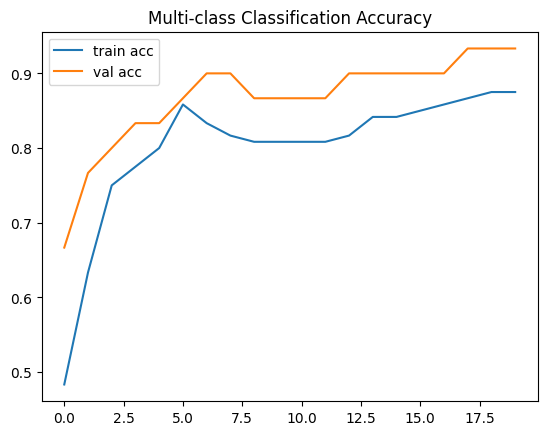

In [3]:
iris = load_iris()
X_multi, y_multi = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
print(y_train[0:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_multi = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, verbose=0)

plt.plot(history_multi.history['accuracy'], label='train acc')
plt.plot(history_multi.history['val_accuracy'], label='val acc')
plt.title('Multi-class Classification Accuracy')
plt.legend()
plt.show()

## 3. Multi-label Classification
- 데이터: sklearn `make_multilabel_classification`
- 출력: sigmoid activation (각 라벨 독립적)

[[0 0 0 1 0]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [1 0 0 0 0]
 [1 0 1 0 0]]


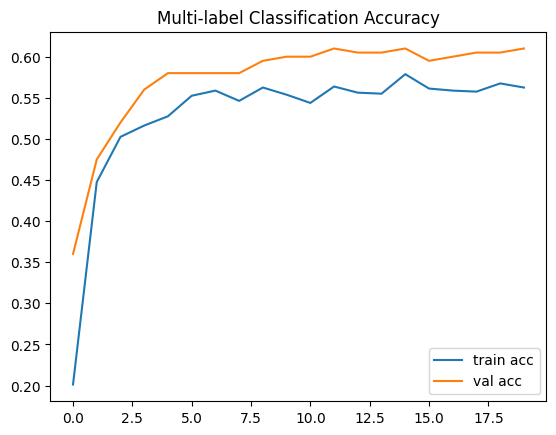

In [4]:
X_mlabel, y_mlabel = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_mlabel, y_mlabel, test_size=0.2, random_state=42)

print(y_mlabel[0:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_mlabel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

model_mlabel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_mlabel = model_mlabel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

plt.plot(history_mlabel.history['accuracy'], label='train acc')
plt.plot(history_mlabel.history['val_accuracy'], label='val acc')
plt.title('Multi-label Classification Accuracy')
plt.legend()
plt.show()